In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

In [2]:
dat = pd.read_csv('get_nicu_admission_05_16.csv')

In [3]:
# assemble bmi, if not measured then calculate from height/weight
dat['bmi'] = np.where(dat.earliest_bmi.isna(), dat.computed_bmi, dat.earliest_bmi)
print(len(dat))
dat.head()

11404


,BIRTHID,PATID,ENCOUNTERID,PREGNANCYID,MOTHERID,MOTHER_ENCOUNTERID,BIRTH_DATE,gest_age_in_days,obs_start_date,preg_start_date,preg_end_date,mother_birth_date,earliest_weight,max_height,earliest_bmi,computed_bmi,nicu_admission,bmi
0,35560466,6411019,84775709,29943407,5338073,84730593,2018-12-31 19:18:00.000,287.0,2018-12-30 20:15:00.000,2018-03-19 19:18:00.000,2018-12-31 19:18:00.000,1993-12-17 00:00:00.000,136.3,63.000,24.48,24.141824,0.0,24.480000
1,35587581,6411076,85055897,35560495,6344872,84711928,2018-12-31 23:41:00.000,274.0,2018-12-31 18:51:00.000,2018-04-01 23:41:00.000,2018-12-31 23:41:00.000,1987-10-29 00:00:00.000,NaN,66.000,NaN,NaN,NaN,NaN
2,35580628,6411094,85243691,30060764,1652041,84743722,2019-01-01 10:36:00.000,288.0,2018-12-31 05:38:00.000,2018-03-19 10:36:00.000,2019-01-01 10:36:00.000,1981-12-29 00:00:00.000,178.2,62.008,32.51,32.581238,0.0,32.510000
3,35588871,6411388,88370965,32868844,6197502,88306407,2019-01-01 20:13:00.000,273.0,2019-01-01 12:43:00.000,2018-04-03 20:13:00.000,2019-01-01 20:13:00.000,1998-01-30 00:00:00.000,189.5,63.000,NaN,33.564752,0.0,33.564752
4,35588399,6411423,88266645,33008295,6209628,88337284,2019-01-02 01:00:00.000,283.0,2019-01-01 09:19:00.000,2018-03-25 01:00:00.000,2019-01-02 01:00:00.000,1987-01-13 00:00:00.000,NaN,59.000,NaN,NaN,0.0,NaN


In [4]:
# select only nicu and bmi is not null
dat_selected = dat[(dat.nicu_admission.isna()==False) & (dat.bmi.isna()==False)].copy()
dat_selected['year'] = pd.to_datetime(dat.preg_end_date).dt.year
len(dat_selected)

6904

In [5]:
# double check
dat_selected.bmi.isna().mean(), dat_selected.nicu_admission.isna().mean()

(0.0, 0.0)

In [6]:
def bmi_group(x):
    '''
      convert bmi to groups
    '''
    if x < 18.5:
        return 'underweight'
    elif x < 25:
        return 'healthy'
    elif x < 30:
        return 'overweight'
    elif x < 35:
        return 'obese_1'
    elif x < 40:
        return 'obese_2'
    else:
        return 'obese_3'

In [7]:
dat_selected['bmi_group'] = dat_selected['bmi'].apply(bmi_group)
dat_selected

,BIRTHID,PATID,ENCOUNTERID,PREGNANCYID,MOTHERID,MOTHER_ENCOUNTERID,BIRTH_DATE,gest_age_in_days,obs_start_date,preg_start_date,preg_end_date,mother_birth_date,earliest_weight,max_height,earliest_bmi,computed_bmi,nicu_admission,bmi,year,bmi_group
0,35560466,6411019,84775709,29943407,5338073,84730593,2018-12-31 19:18:00.000,287.0,2018-12-30 20:15:00.000,2018-03-19 19:18:00.000,2018-12-31 19:18:00.000,1993-12-17 00:00:00.000,136.3,63.000,24.48,24.141824,0.0,24.480000,2018,healthy
2,35580628,6411094,85243691,30060764,1652041,84743722,2019-01-01 10:36:00.000,288.0,2018-12-31 05:38:00.000,2018-03-19 10:36:00.000,2019-01-01 10:36:00.000,1981-12-29 00:00:00.000,178.2,62.008,32.51,32.581238,0.0,32.510000,2019,obese_1
3,35588871,6411388,88370965,32868844,6197502,88306407,2019-01-01 20:13:00.000,273.0,2019-01-01 12:43:00.000,2018-04-03 20:13:00.000,2019-01-01 20:13:00.000,1998-01-30 00:00:00.000,189.5,63.000,NaN,33.564752,0.0,33.564752,2019,obese_1
7,35589122,6411390,88323171,34419250,6008185,88373846,2019-01-02 08:02:00.000,280.0,2019-01-01 10:32:00.000,2018-03-28 08:02:00.000,2019-01-02 08:02:00.000,1999-06-15 00:00:00.000,176.1,64.000,31.12,30.224194,0.0,31.120000,2019,obese_1
9,35593942,6411758,88353234,33544694,5998959,85243664,2019-01-02 10:08:00.000,274.0,2019-01-02 05:08:00.000,2018-04-03 10:08:00.000,2019-01-02 10:08:00.000,1991-10-12 00:00:00.000,195.5,65.000,33.47,32.529349,0.0,33.470000,2019,obese_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11392,74250885,6736246,125698994,65330714,6629795,125517233,2021-12-29 19:39:00.000,275.0,2021-12-27 15:20:00.000,2021-03-29 19:39:00.000,2021-12-29 19:39:00.000,1993-12-15 00:00:00.000,104.3,58.858,21.11,21.165505,0.0,21.110000,2021,healthy
11393,74313362,6736197,125691839,65588396,1051134,125558699,2021-12-29 20:27:00.000,275.0,2021-12-28 20:31:00.000,2021-03-29 20:27:00.000,2021-12-29 20:27:00.000,1992-11-24 00:00:00.000,218.1,71.654,32.13,29.862772,0.0,32.130000,2021,obese_1
11394,74363722,6734972,125501860,65599510,1408466,125689009,2021-12-29 20:38:00.000,272.0,2021-12-29 16:20:00.000,2021-04-01 20:38:00.000,2021-12-29 20:38:00.000,2000-01-25 00:00:00.000,179.6,60.906,35.00,34.036234,0.0,35.000000,2021,obese_2
11396,74364402,6734940,125499143,66082639,1781819,125597315,2021-12-30 02:39:00.000,262.0,2021-12-29 23:37:00.000,2021-04-12 02:39:00.000,2021-12-30 02:39:00.000,1997-01-02 00:00:00.000,127.3,65.000,21.80,21.181515,0.0,21.800000,2021,healthy


In [8]:
# get the values
group_ref = dat_selected[dat_selected.bmi_group=='healthy'].nicu_admission.values
for bmi_group in ['underweight','healthy','overweight','obese_1','obese_2','obese_3']:
    group_compare = dat_selected[dat_selected.bmi_group==bmi_group].nicu_admission.values
    p_val = ttest_ind(group_ref, group_compare).pvalue
    print(f"{bmi_group} count={len(group_compare)} nicu_count={group_compare.sum()} ratio={group_compare.mean()} p={p_val}")

underweight count=175 nicu_count=15.0 ratio=0.08571428571428572 p=0.8108418401119706
healthy count=2118 nicu_count=193.0 ratio=0.091123701605288 p=1.0
overweight count=1834 nicu_count=154.0 ratio=0.08396946564885496 p=0.42817812118836085
obese_1 count=1308 nicu_count=140.0 ratio=0.10703363914373089 p=0.1267668488551592
obese_2 count=790 nicu_count=94.0 ratio=0.1189873417721519 p=0.025027363243245296
obese_3 count=679 nicu_count=98.0 ratio=0.14432989690721648 p=7.642923160418171e-05


In [9]:
dat_selected['obesity'] = np.where(dat_selected.bmi >= 30, 'yes', 'no')
dat_selected.head()

,BIRTHID,PATID,ENCOUNTERID,PREGNANCYID,MOTHERID,MOTHER_ENCOUNTERID,BIRTH_DATE,gest_age_in_days,obs_start_date,preg_start_date,...,mother_birth_date,earliest_weight,max_height,earliest_bmi,computed_bmi,nicu_admission,bmi,year,bmi_group,obesity
0,35560466,6411019,84775709,29943407,5338073,84730593,2018-12-31 19:18:00.000,287.0,2018-12-30 20:15:00.000,2018-03-19 19:18:00.000,...,1993-12-17 00:00:00.000,136.3,63.000,24.48,24.141824,0.0,24.480000,2018,healthy,no
2,35580628,6411094,85243691,30060764,1652041,84743722,2019-01-01 10:36:00.000,288.0,2018-12-31 05:38:00.000,2018-03-19 10:36:00.000,...,1981-12-29 00:00:00.000,178.2,62.008,32.51,32.581238,0.0,32.510000,2019,obese_1,yes
3,35588871,6411388,88370965,32868844,6197502,88306407,2019-01-01 20:13:00.000,273.0,2019-01-01 12:43:00.000,2018-04-03 20:13:00.000,...,1998-01-30 00:00:00.000,189.5,63.000,NaN,33.564752,0.0,33.564752,2019,obese_1,yes
7,35589122,6411390,88323171,34419250,6008185,88373846,2019-01-02 08:02:00.000,280.0,2019-01-01 10:32:00.000,2018-03-28 08:02:00.000,...,1999-06-15 00:00:00.000,176.1,64.000,31.12,30.224194,0.0,31.120000,2019,obese_1,yes
9,35593942,6411758,88353234,33544694,5998959,85243664,2019-01-02 10:08:00.000,274.0,2019-01-02 05:08:00.000,2018-04-03 10:08:00.000,...,1991-10-12 00:00:00.000,195.5,65.000,33.47,32.529349,0.0,33.470000,2019,obese_1,yes


In [10]:
# plot as a function of year
# there're only 2 records for 2018, so remove them
tmp = dat_selected[dat_selected.year>2018].groupby(['year','obesity'])['nicu_admission'].value_counts(normalize=True).rename('percentage').reset_index()
tmp

,year,obesity,nicu_admission,percentage
0,2019,no,0.0,0.868607
1,2019,no,1.0,0.131393
2,2019,yes,0.0,0.837241
3,2019,yes,1.0,0.162759
4,2020,no,0.0,0.932673
5,2020,no,1.0,0.067327
6,2020,yes,0.0,0.898821
7,2020,yes,1.0,0.101179
8,2021,no,0.0,0.924848
9,2021,no,1.0,0.075152


Text(40.122291666666655, 0.5, 'NICU admission rate')

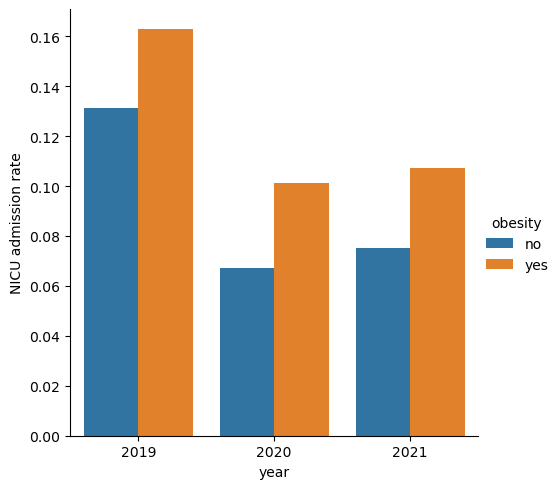

In [11]:
sns.catplot(tmp[tmp.nicu_admission==1], x='year', y='percentage', hue='obesity', kind='bar')
plt.ylabel('NICU admission rate')

In [12]:
# get BMI < 30 and >= 30 to compare with paper
group1 = dat_selected[dat_selected.bmi >= 30].nicu_admission
group2 = dat_selected[dat_selected.bmi < 30].nicu_admission
print(ttest_ind(group_ref, group_compare).pvalue)
(dat_selected[dat_selected.bmi < 30].nicu_admission.value_counts(),
dat_selected[dat_selected.bmi >= 30].nicu_admission.value_counts())

7.642923160418171e-05


(nicu_admission
 0.0    3765
 1.0     362
 Name: count, dtype: int64,
 nicu_admission
 0.0    2445
 1.0     332
 Name: count, dtype: int64)